# Ray-sphere intersection
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [ray-intersection_sphere.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Graphics/ray-intersection_sphere.ipynb)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.seterr(divide='ignore', invalid='ignore')
plt.rcParams['figure.figsize'] = (16, 4)

## Primitives
---
The first thing is to define the ray origin $O$ and direction $\large ê$, where the unit vector $\large ê = \frac{\vec{e}}{\parallel \vec{e} \parallel}$.

![image 01](sourceimages/ray-intersection_sphere_01.jpg)

In [3]:
## Ray
O = np.array([0, 0])         # Origin pont
e_ = np.array([0.5, 0.5])    # Ray direction
e_ /= np.linalg.norm(e_)     # Unit vector of e_

Next step is to define the sphere/circle center $C_s$ and radius $\large r$.

![image 02](sourceimages/ray-intersection_sphere_02.jpg)

In [4]:
# Sphere
Cs = np.array([2, 0])        # Center of sphere
r = 1.5                      # Radius of sphere

## Intersection
---
To find the ray intersection, the next step is define the oriented segment $\overline{OC} = Cs - O$.
![image 03](sourceimages/ray-intersection_sphere_03.jpg)

In [5]:
OC_ = Cs - O  # Oriented segment from origin to center of the sphere

Next step, we need to find the parameter $\large t$ which will parametrize the ray segment and find the intersections from the origin. The value $\large t$ can be found by projecting the vetor $\vec{OC}$ on the versor $\large ê$. The projection of a vector $\large \vec{a}$ on a $\large \vec{b}$ can be defined as the geometric representation of *dot product*:

$$ \large
a_1 = \parallel a \parallel \cos{\theta} = a \cdot \hat{b} = a \cdot \frac{\vec{b}}{\parallel \vec{b} \parallel}
$$

![image 04](sourceimages/ray-intersection_sphere_04.jpg)

In [6]:
t = np.dot(OC_, e_)   # Vector projection of OC_ on e_

Having the parameter $\large t$, we can finally define the segment which will give us the point $P_e$ projected from center of the sphere on the ray direction. Applying the concept of *parametrized line*, we can define:

$$ \large
P_e = O + t \cdot \hat{e}
$$

Having this point, we can find the distance between $C_s$ and $P_e$ with ${\parallel P_e - C_s \parallel}_2$.

![image 05](sourceimages/ray-intersection_sphere_05.jpg)

In [7]:
Pe = O + e_*t                # Point on vector e_ projected from OC_
d = np.linalg.norm(Pe - Cs)  # Distance from the point Pe and the center of the sphere

Notice that now we have the distance $\large d$ so we can make some assumptions:

- If $d > r$ then there is no intersections;
- If $d = r$ then there is 1 intersection (tangent);
- if $d < r$ there are 2 intersections.

![image 06](sourceimages/ray-intersection_sphere_06.jpg)

Now we have all the necessary to calculate the intersection positions using the *pythagorean theorem* se we can have the value $\large i$ and define the positions based on the parametrized line from origin.

$$ \large
\begin{aligned}
P_s^1 & = O + \hat{e} \cdot (t - i) \\
P_s^2 & = O + \hat{e} \cdot (t + i)
\end{aligned}
$$

![image 07](sourceimages/ray-intersection_sphere_07.jpg)

In [8]:
# Position of the intersections
if(d > r):
    print("No intersection!")
elif(d == r):
    Ps = Pe
    print(f'Intersection at {Ps}')
else:
    i = (r**2 - d**2)**0.5
    Ps1 = O + e_*(t - i)
    Ps2 = O + e_*(t + i)
    print(f'Intersections at {Ps1} and {Ps2}')

Intersections at [0.64644661 0.64644661] and [1.35355339 1.35355339]


## Example
---

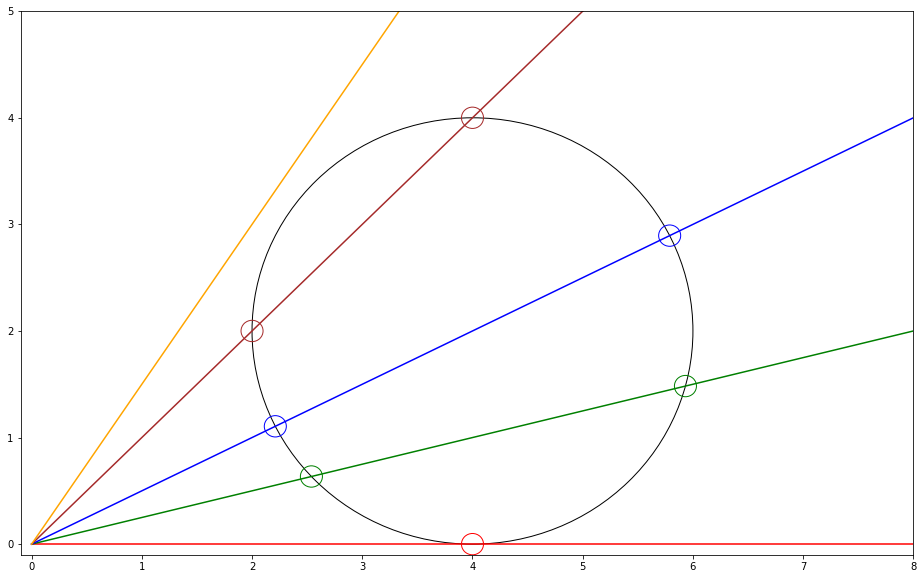

In [9]:
fig, ax = plt.subplots(figsize=(16, 10))

# Define x points to draw lines
x = np.array([0, 8])
colors = ["red", "green", "blue", "brown","orange"]

# Define angular coeficients
M = [0, 0.25, 0.5, 1, 1.5]

# Define sphere
Cs = [4, 2]
r = 2
Circle = plt.Circle(Cs, r, color="k", fill=0)
ax.add_artist(Circle)

# Draw intersections
for index, m in enumerate(M):
    y = m*x
    plt.plot(x, y, color=colors[index])
    plt.xlim([-0.1, 8])
    plt.ylim([-0.1, 5])
    
    # Define ray
    O = np.array([0, 0])
    e_ = np.array([1, m])
    e_ = e_/np.linalg.norm(e_)
    
    # Intersection
    OC_ = Cs - O
    t = np.dot(OC_, e_)
    Pe = O + e_*t
    d = np.linalg.norm(Pe - Cs)
    
    # Draw intersections
    if(d == r):
        Ps = Pe
        Circle = plt.Circle(Ps, 0.1, color=colors[index], fill=0)
        ax.add_artist(Circle)
    if(d < r):
        i = (r**2 - d**2)**0.5
        Ps1 = O + e_*(t - i)
        Circle = plt.Circle(Ps1, 0.1, color=colors[index], fill=0)
        ax.add_artist(Circle)
        Ps2 = O + e_*(t + i)
        Circle = plt.Circle(Ps2, 0.1, color=colors[index], fill=0)
        ax.add_artist(Circle)

plt.show()

## 3D Intersection
---
Apply same model for each pixel of an *image plane* as the *origin* and the *ray direction* is based on the perspective camera model:

![image 07](sourceimages/ray-intersection_sphere_08.jpg)

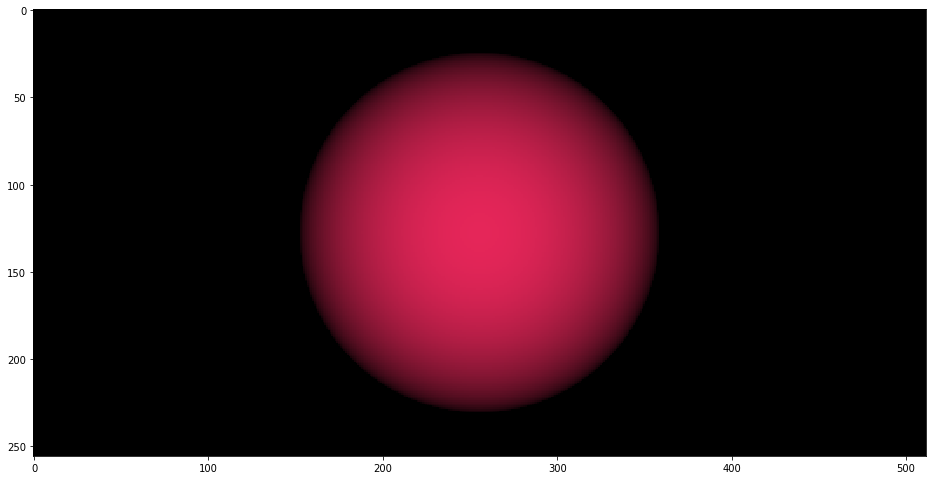

In [10]:
N, M = 256j, 512j
O = np.ones((int(N.imag), int(M.imag), 3))               # Init image plane origin
O[..., 0], O[..., 1] = np.mgrid[0.5:-0.5:N, -1:1:M]      # Image plane uvw coordinates
e_ = O/np.linalg.norm(O, axis=2)[:,:,np.newaxis]         # Normalized ray directon e_

# Sphere
Cs = np.array([0, 0, 4])                                 # Center of sphere
r = 1.5                                                  # Radius of sphere

OC_ = Cs - O                                             # Oriented segment from origin to center of the sphere

vec_dot = np.vectorize(np.dot, signature='(n),(m)->()')  # Vectorize dot product function
t = vec_dot(OC_, e_)                                     # Pixelwise dot product
Pe = O + e_*t[:,:,np.newaxis]                            # Point on vector e_ projected from OC_
d = np.linalg.norm(Pe - Cs, axis=2)                      # Distance from the point Pe and the center of the sphere

# Find intersection position
i = (r**2 - d**2)**0.5                                   # 
Ps = O + e_*(t - i)[:,:,np.newaxis]                      # 

# Facing ratio (incidence value)
i_ = i[:,:,np.newaxis]/r

output = np.zeros((int(N.imag), int(M.imag), 3))         # Init output image
output[d < r] = (0.9, 0.15, 0.35)*i_[d < r]              # Shade with color and fr

fig, ax = plt.subplots(figsize=(16, 10))
ax.imshow(output)
plt.show()